In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=5000,noise=0.3,random_state=666)

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 666)

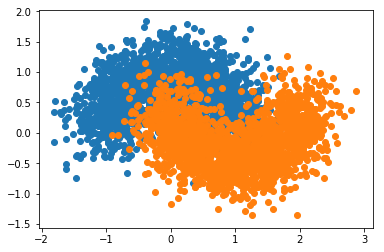

In [4]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1])
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1])
plt.show()

### 对于集成学习来说 得到更多的不同吗模型 效果就会更好 于是我们想到了用样本的一部分来训练一个模型

### Bagging！(放回不放回在sklearn中的区别是bootstrap)

In [5]:
from sklearn.ensemble import BaggingClassifier

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
bac = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)

In [19]:
bac.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [20]:
bac.score(X_train,y_train)

0.91466666666666663

In [21]:
bac.score(X_test,y_test)

0.9032

In [22]:
dc = DecisionTreeClassifier()

In [23]:
dc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
dc.score(X_test,y_test)

0.86880000000000002

In [25]:
dc.score(X_train,y_train)

1.0

### bagging放回取样  缺陷：平均有37%的数据并未被使用过  所以我们可以把它作为测试集 于是有了以下代码

In [26]:
bac = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,oob_score=True)

In [27]:
bac.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [29]:
bac.oob_score_

0.91080000000000005

### boostrap features 通过选取不同的训练数据且不同的特征进行模型训练

In [31]:
bac = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,oob_score=True,max_features=1,bootstrap_features=True)

In [32]:
bac.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=True, max_features=1,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

由于我们的样本只有两个特征所以训练的效果不是很好

In [33]:
bac.oob_score_

0.88880000000000003